In [1]:
import sys

In [6]:
sys.version

'3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]'

In [7]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# read data - 보스턴 집값에 대한 데이터 medv 는 중위수
df = pd.read_csv('./data05_boston.csv')

In [9]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [33]:
# simple linear regression
from sklearn.linear_model import LinearRegression # LinearRegression : 클래스
X = df[ ['lstat'] ] ## df[[]] : 대괄호 안에 대괄호를 쓰면 n x n array 형태 => 이유는 입력값이 array 형태이어야함
y = df['medv'] # 1차원 vector
lm = LinearRegression() # lm이라는 객체를 생성
lm.fit(X,y) # LinearRegression 밑에 있는 함수 사용
lm.coef_  # coefficients
lm.intercept_ # intercepter
yhat = lm.predict(X) # prediction
r2 = lm.score(X,y) # R2
rmse = np.sqrt(((y-yhat)**2).mean())
# sklearn에서는 단순히 값만 도출하고 끝남, 컴퓨터하는 사람들이 만들었으므로 p-value 등의 통계분석이 들어가있지 않음

In [34]:
print(lm.coef_), print(lm.intercept_)

[-0.95004935]
34.55384087938311


(None, None)

In [38]:
X.shape

(506, 1)

In [35]:
rmse

6.203464131426421

In [29]:
r2

0.6390341221591789

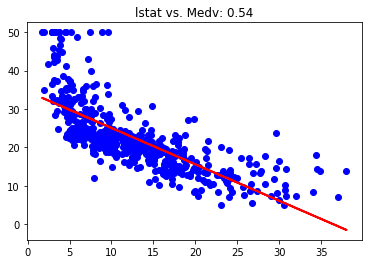

In [39]:
# 그림 그리기 - 독립변수가 3개라서, 최소 4차원의 그림이 필요
plt.plot(X,y,'bo')
plt.plot(X,yhat,'r',linewidth=2)
plt.title('%s vs. Medv: %.2f' % ('lstat',r2))
plt.show()

In [40]:
# multiple linear regression
X = df.iloc[:,0:13]
y = df['medv']
lm = LinearRegression()
lm.fit(X,y)
lm.coef_  # coefficients
lm.intercept_ # intercepter
yhat = lm.predict(X) # prediction
r2 = lm.score(X,y) # R2
rmse = np.sqrt(((y-yhat)**2).mean())

In [45]:
rmse # train set 에서의 성능은 좋아지지만 test set에서 항상 좋은 것은 아님; overfitting의 문제

4.679191295697284

In [43]:
r2 # train set 에서의 성능은 좋아지지만 test set에서 항상 좋은 것은 아님; overfitting의 문제

0.7406426641094093

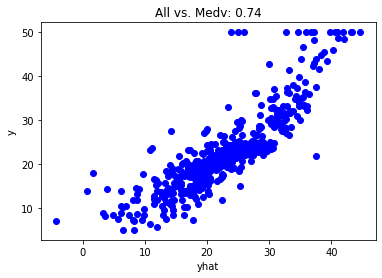

In [48]:
plt.plot(yhat,y,'bo')
plt.xlabel('yhat')
plt.ylabel('y')
plt.title('All vs. Medv: %.2f' % r2)
plt.show()

In [56]:
# 파이썬에서 R을 사용하고 싶어서 만든 라이브러리는 STATSMODEL
# using StatsModel
import statsmodels.api as sm
X = df.iloc[:,0:13]
X = sm.add_constant(X)
y = df['medv']
f = sm.OLS(y,X)
r = f.fit() # dir(r) => r(f.fit())에 포함되어있는 함수들 보여줌
r.summary() 

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          6.72e-135
Time:                        16:29:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          1.56e-112
Time:                        16:37:24   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
lstat         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
lstat2         0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

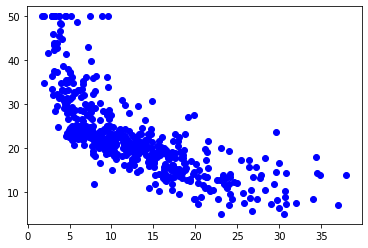

In [58]:
# add a new variable
plt.plot(df['lstat'],df['medv'],'bo')
X = df[ ['lstat'] ]
lstat2 = X['lstat']**2
X['lstat2'] = lstat2
X = sm.add_constant(X)
y = df['medv']
f = sm.OLS(y,X)
r = f.fit()
r.summary()

In [59]:
# interaction 상호작용
X = df[ ['lstat','rm'] ]
X['lstat_rm'] = X['lstat'] * X['rm']
X = sm.add_constant(X)
y = df['medv']
f = sm.OLS(y,X)
r = f.fit()
r.summary()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          1.75e-146
Time:                        16:37:38   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.1245      3.342     -8.713      0.000     -35.692     -22.558
lstat          2.1940      0.206     10.666      0.000       1.790       2.598
rm             9.7013      0.500     19.393      0.000       8.718      10.684
lstat_rm      -0.4849      0.035    -14.018      0.000      -0.553      -0.417
==============================================================================
Omnibus:                      223.968   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2182.462
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      12.613   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# training vs. test set
np.random.seed(1) # 초기 변수 설정.
train_idx = list(np.random.choice(np.arange(df.shape[0]),300,replace=False))
test_idx = list(set(np.arange(df.shape[0])).difference(train_idx))
dftrain = df.iloc[train_idx,:]
dftest = df.iloc[test_idx,:]

xtrain = dftrain.iloc[:,[0,1,3,4,5,7,8,9,10,11,12]] # 의미있는 몇개 변수만 선택(모델이 복잡할때 오히려 성능이 안좋음).
ytrain = dftrain['medv']
xtest = dftest.iloc[:,[0,1,3,4,5,7,8,9,10,11,12]]
ytest = dftest['medv']

lm = LinearRegression()
lm.fit(xtrain,ytrain)

yhat_train = lm.predict(xtrain)
rmse_train = np.sqrt( ((ytrain-yhat_train)**2).mean() )
r2_train = lm.score(xtrain,ytrain)

yhat_test = lm.predict(xtest)
rmse_test = np.sqrt( ((ytest-yhat_test)**2).mean() )
r2_test = lm.score(xtest,ytest)

print(rmse_train,rmse_test)

4.493212205917353 5.03641276223313


In [84]:
# Prcatices
import statsmodels.api as sm
df = pd.read_csv('./data01_iris.csv')

In [85]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
X = df[['Sepal.Length','Petal.Length','Petal.Width']]
Y = df['Sepal.Width']

In [87]:
X = sm.add_constant(X)
X

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Sepal.Length,Petal.Length,Petal.Width
0,1.0,5.1,1.4,0.2
1,1.0,4.9,1.4,0.2
2,1.0,4.7,1.3,0.2
3,1.0,4.6,1.5,0.2
4,1.0,5.0,1.4,0.2
5,1.0,5.4,1.7,0.4
6,1.0,4.6,1.4,0.3
7,1.0,5.0,1.5,0.2
8,1.0,4.4,1.4,0.2
9,1.0,4.9,1.5,0.1


In [88]:
f = sm.OLS(Y,X)
r = f.fit() # dir(r) => r(f.fit())에 포함되어있는 함수들 보여줌
r.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sepal.Width   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     53.58
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           2.06e-23
Time:                        17:21:08   Log-Likelihood:                -32.100
No. Observations:                 150   AIC:                             72.20
Df Residuals:                     146   BIC:                             84.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0431      0.271      3.855      0.000       0.508       1.578
Sepal.Length     0.6071      0.062      9.765      0.000       0.484       0.730
Petal.Length    -0.5860      0.062     -9.431      0.000      -0.709      -0.463
Petal.Width      0.5580      0.123      4.553      0.000       0.316       0.800
==============================================================================
Omnibus:                        0.738   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.426
Skew:                          -0.102   Prob(JB):                        0.808
Kurtosis:                       3.163   Cond. No.                         82.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
lm.fit(X,Y)
yhat = lm.predict(X) # prediction
rmse = np.sqrt( ((Y-yhat)**2).mean() )

In [90]:
rmse

0.2997098515259793

In [91]:
import copy
X_SL2 = copy.copy(X)
X_SL2['SL2'] = X['Sepal.Length']**2
f = sm.OLS(Y,X_SL2)
r = f.fit() # dir(r) => r(f.fit())에 포함되어있는 함수들 보여줌
r.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sepal.Width   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     39.95
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           1.59e-22
Time:                        17:21:14   Log-Likelihood:                -32.061
No. Observations:                 150   AIC:                             74.12
Df Residuals:                     145   BIC:                             89.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3778      1.253      1.100      0.273      -1.099       3.854
Sepal.Length     0.4945      0.416      1.188      0.237      -0.328       1.317
Petal.Length    -0.5862      0.062     -9.403      0.000      -0.709      -0.463
Petal.Width      0.5634      0.124      4.526      0.000       0.317       0.809
SL2              0.0091      0.033      0.274      0.785      -0.057       0.075
==============================================================================
Omnibus:                        0.748   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.445
Skew:                          -0.109   Prob(JB):                        0.800
Kurtosis:                       3.153   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
X_PL2 = copy.copy(X)
X_PL2['PL2'] = X['Petal.Length']**2
f = sm.OLS(Y,X_PL2)
r = f.fit() # dir(r) => r(f.fit())에 포함되어있는 함수들 보여줌
r.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sepal.Width   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     48.70
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           6.51e-26
Time:                        17:21:19   Log-Likelihood:                -23.902
No. Observations:                 150   AIC:                             57.80
Df Residuals:                     145   BIC:                             72.86
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0109      0.349      5.757      0.000       1.320       2.701
Sepal.Length     0.4833      0.066      7.283      0.000       0.352       0.614
Petal.Length    -0.8635      0.090     -9.605      0.000      -1.041      -0.686
Petal.Width      0.5334      0.117      4.575      0.000       0.303       0.764
PL2              0.0481      0.012      4.092      0.000       0.025       0.071
==============================================================================
Omnibus:                        2.862   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.442
Skew:                          -0.211   Prob(JB):                        0.295
Kurtosis:                       3.461   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
X_PW2 = copy.copy(X)
X_PW2['PW2'] = X['Petal.Width']**2
f = sm.OLS(Y,X_PW2)
r = f.fit() # dir(r) => r(f.fit())에 포함되어있는 함수들 보여줌
r.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sepal.Width   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     49.43
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           3.52e-26
Time:                        17:21:20   Log-Likelihood:                -23.261
No. Observations:                 150   AIC:                             56.52
Df Residuals:                     145   BIC:                             71.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4905      0.277      5.387      0.000       0.944       2.037
Sepal.Length     0.5141      0.063      8.196      0.000       0.390       0.638
Petal.Length    -0.3997      0.073     -5.454      0.000      -0.545      -0.255
Petal.Width     -0.3951      0.252     -1.567      0.119      -0.893       0.103
PW2              0.2671      0.063      4.259      0.000       0.143       0.391
==============================================================================
Omnibus:                        0.761   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.493
Skew:                          -0.128   Prob(JB):                        0.782
Kurtosis:                       3.116   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# interaction 상호작용
X['SL_PL'] = X['Sepal.Length'] * X['Petal.Length']
f = sm.OLS(Y,X)
r = f.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sepal.Width   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     40.84
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           6.86e-23
Time:                        17:22:52   Log-Likelihood:                -31.181
No. Observations:                 150   AIC:                             72.36
Df Residuals:                     145   BIC:                             87.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7657      0.604      2.922      0.004       0.571       2.960
Sepal.Length     0.4679      0.121      3.862      0.000       0.228       0.707
Petal.Length    -0.7369      0.129     -5.722      0.000      -0.991      -0.482
Petal.Width      0.5743      0.123      4.675      0.000       0.332       0.817
SL_PL            0.0275      0.021      1.336      0.183      -0.013       0.068
==============================================================================
Omnibus:                        0.939   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.601
Skew:                          -0.127   Prob(JB):                        0.741
Kurtosis:                       3.178   Cond. No.                         695.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
X1 = df.iloc[:,[0,2,3]]
X1

In [115]:
x = np.zeros(150)
x[df['Species'] == 'setosa']=1
X1['setosa'] = x

x = np.zeros(150)
x[df['Species'] == 'versicolor']=1
X1['versicolor'] = x

x = np.zeros(150) # 사실 virginica는 안 만들어도 됨. setosa도 0, versicolor도 0이면 virginica라는 뜻
x[df['Species'] == 'virginica']=1
X1['virginica'] = x

In [127]:
f = sm.OLS(Y,X1)
r = f.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sepal.Width   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     50.14
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           7.15e-30
Time:                        17:34:07   Log-Likelihood:                -12.154
No. Observations:                 150   AIC:                             36.31
Df Residuals:                     144   BIC:                             54.37
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sepal.Length     0.3778      0.066      5.761      0.000       0.248       0.507
Petal.Length    -0.1876      0.083     -2.246      0.026      -0.353      -0.023
Petal.Width      0.6257      0.123      5.072      0.000       0.382       0.870
setosa           1.6572      0.256      6.475      0.000       1.151       2.163
versicolor       0.4969      0.264      1.882      0.062      -0.025       1.019
virginica        0.2589      0.319      0.812      0.418      -0.372       0.889
==============================================================================
Omnibus:                        8.540   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.898
Skew:                          -0.356   Prob(JB):                      0.00430
Kurtosis:                       4.112   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""